In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import re

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
# Удаляем пустые значения
df.dropna(inplace=True)

In [4]:
# Преобразуем столбцы в числовой формат
df['Rating'] = pd.to_numeric(df['Rating'])
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [5]:
# преобразование количественных признаков
size_pattern = re.compile(r'(\d+(\.\d+)?)([KMGT])?B?', re.IGNORECASE)
def parse_size(size):
    match = size_pattern.match(size)
    if match:
        num = float(match.group(1))
        suffix = match.group(3)
        if suffix == 'K':
            num *= 1e-3
        elif suffix == 'M':
            num *= 1e-6
        elif suffix == 'G':
            num *= 1e-9
        elif suffix == 'T':
            num *= 1e-12
        return num
    else:
        return None
df['Size'] = df['Size'].apply(parse_size)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = pd.to_numeric(df['Price'])

In [6]:
# Кодируем категориальные признаки
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Type'] = le.fit_transform(df['Type'])
df['Content Rating'] = le.fit_transform(df['Content Rating'])
df['Genres'] = le.fit_transform(df['Genres'])

In [7]:
# Масштабируем числовые признаки
scaler = StandardScaler()
df[['Reviews', 'Size', 'Installs', 'Price']] = scaler.fit_transform(df[['Reviews', 'Size', 'Installs', 'Price']])

In [8]:
# Удаляем пустые значения
df.dropna(inplace=True)
# Создание матрицы признаков и целевой переменной
X = df.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver', 'Rating'], axis=1)
y = df['Rating']

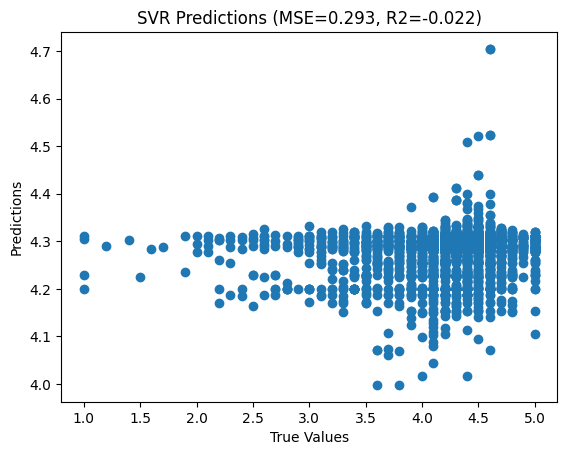

In [9]:
# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучаем модель
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Получаем предсказания на тестовом наборе
y_pred = svr.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Строим график
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVR Predictions (MSE={:.3f}, R2={:.3f})'.format(mse, r2))
plt.show()

In [10]:
# Замена пропущенных значений и разделение данных на тренировочный и тестовый наборы
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Получение предсказаний на тестовом наборе
y_pred = rf.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Random Forest MSE:', mse)
print('Random Forest R2:', r2)

Random Forest MSE: 0.2903373820649088
Random Forest R2: -0.012275194907591658


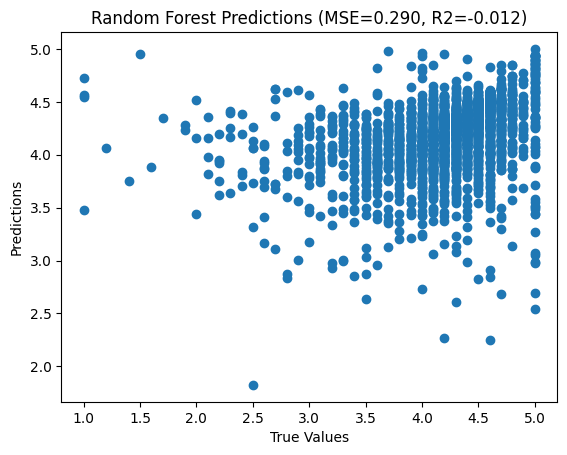

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Predictions (MSE={:.3f}, R2={:.3f})'.format(mse, r2))
plt.show()